In [14]:
import pandas as pd
import ast

# Load your Excel file
input_excel_path = 'D:/project 3/jaipur_cars.xlsx'

# Read the Excel file into a pandas DataFrame
df = pd.read_excel(input_excel_path, engine='openpyxl')

output_csv_path = 'D:/project 3/streatured/jaipur_cars_Structured.csv'

# Function to flatten the dictionary
def flatten_dict(d, parent_key='', sep='_'):
    items = []
    for k, v in d.items():
        new_key = f'{parent_key}{sep}{k}' if parent_key else k
        if isinstance(v, dict):
            items.extend(flatten_dict(v, new_key, sep=sep).items())
        elif isinstance(v, list):
            for i, item in enumerate(v):
                if isinstance(item, dict):
                    items.extend(flatten_dict(item, f'{new_key}_{i}', sep=sep).items())
                else:
                    items.append((f'{new_key}_{i}', item))
        else:
            items.append((new_key, v))
    return dict(items)

# Initialize empty DataFrames for each column
structured_details_df = pd.DataFrame()
structured_overview_df = pd.DataFrame()
structured_features_df = pd.DataFrame()
structured_specs_df = pd.DataFrame()
structured_links_df = pd.DataFrame()

# Process 'new_car_detail' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_detail']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_details_df = pd.DataFrame(flattened_data)

# Process 'new_car_overview' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_overview']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_overview_df = pd.DataFrame(flattened_data)

# Process 'new_car_feature' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_feature']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_features_df = pd.DataFrame(flattened_data)

# Process 'new_car_specs' column
flattened_data = []
for index, row in df.iterrows():
    unstructured_data = row['new_car_specs']
    unstructured_data = ast.literal_eval(unstructured_data)
    flattened_row = flatten_dict(unstructured_data)
    flattened_data.append(flattened_row)
structured_specs_df = pd.DataFrame(flattened_data)

# Process 'car_links' column (if not a nested structure, just copy as is)
structured_links_df = df[['car_links']].copy()

# Merge all structured DataFrames into one
bangalore_cars_Structured = pd.concat([structured_details_df, structured_overview_df, structured_features_df, structured_specs_df, structured_links_df], axis=1)

# Add the 'City' column
# Assign the city name to all rows; you can change 'YourCityName' to the desired city name
bangalore_cars_Structured['City'] = 'jaipur'

# Save the merged DataFrame to a CSV file
bangalore_cars_Structured.to_csv(output_csv_path, index=False)

# Display the merged DataFrame
print(bangalore_cars_Structured)

      it      ft         bt        km transmission  ownerNo      owner  \
0      0  Diesel  Hatchback  1,20,000       Manual        2  2nd Owner   
1      0  Petrol  Hatchback    66,951       Manual        1  1st Owner   
2      0  Petrol  Hatchback    80,000    Automatic        2  2nd Owner   
3      0  Petrol  Hatchback    44,392       Manual        1  1st Owner   
4      0  Petrol  Hatchback    40,000    Automatic        1  1st Owner   
...   ..     ...        ...       ...          ...      ...        ...   
1115   0  Petrol  Hatchback  1,20,000       Manual        1  1st Owner   
1116   0  Petrol  Hatchback    70,000       Manual        1  1st Owner   
1117   0  Petrol        SUV    20,000       Manual        1  1st Owner   
1118   0  Petrol  Hatchback    40,000       Manual        1  1st Owner   
1119   0  Petrol  Hatchback    80,000       Manual        1  1st Owner   

            oem              model  modelYear  ...  data_1_list_8_key  \
0       Hyundai        Hyundai i20    

In [16]:
import pandas as pd
import os

# List of file paths for each city's dataset
file_paths = [
    'D:/project 3/streatured/bangalore_cars_Structured.csv',
    'D:/project 3/streatured/chennai_cars_Structured.csv',
    'D:/project 3/streatured/delhi_cars_Structured.csv',
    'D:/project 3/streatured/hyderabad_cars_Structured.csv',
    'D:/project 3/streatured/jaipur_cars_Structured.csv',
    'D:/project 3/streatured/kolkata_cars_Structured.csv'
]

# List to store the individual DataFrames
dataframes = []

# Loop through each file path and read the CSV file into a DataFrame
for file_path in file_paths:
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Save the combined DataFrame to the specified path
output_path = 'D:/project 3/streatured/car_dekho_Structured.csv'
combined_df.to_csv(output_path, index=False)

print(f"All datasets concatenated and saved to {output_path}")

All datasets concatenated and saved to D:/project 3/streatured/car_dekho_Structured.csv


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

# Load the dataset
df = pd.read_csv('D:/project 3/streatured/car_dekho_Structured.csv', low_memory=False)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
import numpy as np

def convert_price(price):
    try:
        # Remove the currency symbol (₹) and commas
        price = str(price).replace('₹', '').replace(',', '').strip()
        
        # Handle prices in "Crore"
        if 'Crore' in price:
            return float(price.replace('Crore', '').strip()) * 10000000
        
        # Handle prices in "Lakh"
        elif 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        
        # Handle plain numeric prices
        else:
            return float(price)
    
    except ValueError:
        # Return NaN if conversion fails
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)


# Clean the 'km' column by removing commas and converting to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

# Label Encoding for categorical variables
label_encoders = {}
def label_encode(df, columns):
    global label_encoders
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
            label_encoders[col] = le
    return df

categorical_columns = ['ft', 'bt', 'transmission', 'oem', 'model', 'variantName', 'City']
df = label_encode(df, categorical_columns)

# Normalizing numerical features using Min-Max Scaling, excluding 'price'
scalers = {}
def min_max_scaling(df, columns):
    global scalers
    for col in columns:
        if col in df.columns:
            scaler = MinMaxScaler()
            df[col] = scaler.fit_transform(df[[col]])
            scalers[col] = scaler
    return df

df = min_max_scaling(df, ['km', 'modelYear', 'ownerNo', 'mileage', 'Seats'])

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv('D:/project 3/cleaned_dataset/car_dekho_cleaned_dataset.csv', index=False)

# Save preprocessing steps
joblib.dump(label_encoders, 'D:/project 3/cleaned_dataset/label_encoders.pkl')
joblib.dump(scalers, 'D:/project 3/cleaned_dataset/scalers.pkl')

print("Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.")
print("Preprocessing steps saved.")


Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset.csv'.
Preprocessing steps saved.


C:\Users\Siva\AppData\Local\Temp\ipykernel_177352\149742180.py:7: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df_scaled = pd.read_csv('D:/project 3/cleaned_dataset/car_dekho_cleaned_dataset.csv')
C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


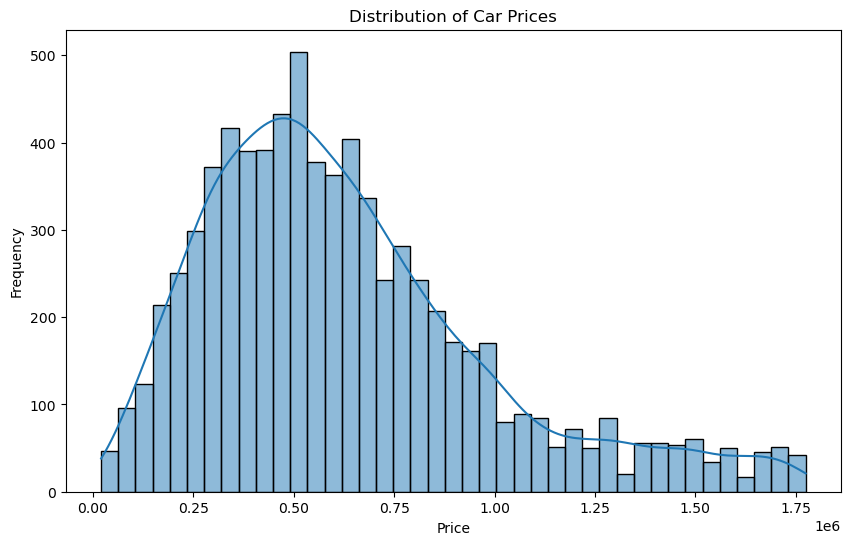

C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


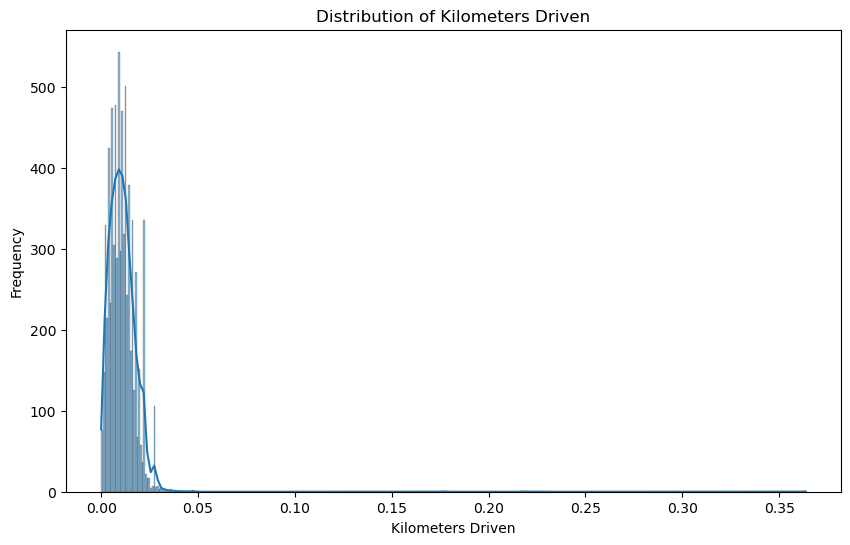

C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


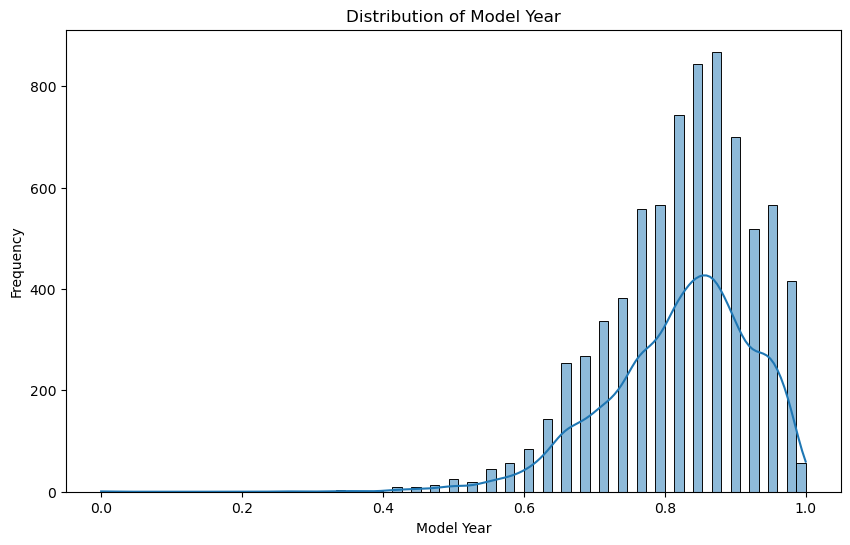

C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


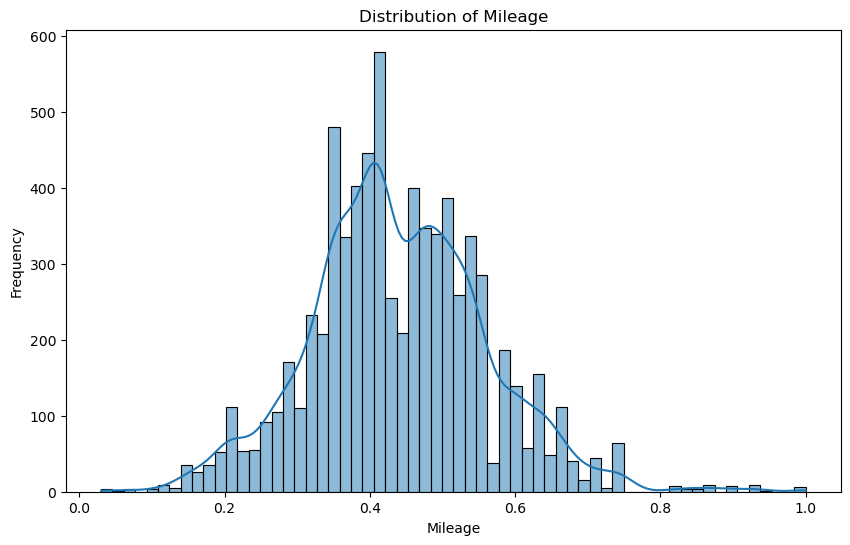

C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


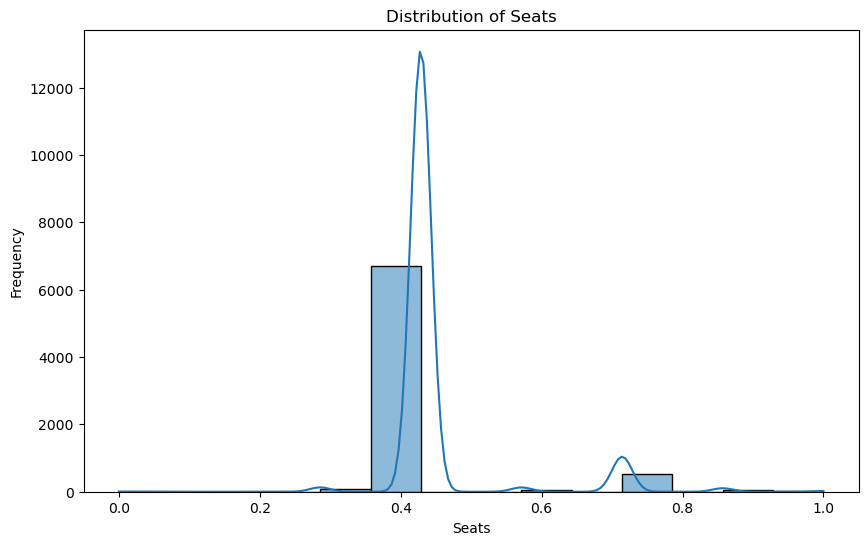

C:\Users\Siva\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


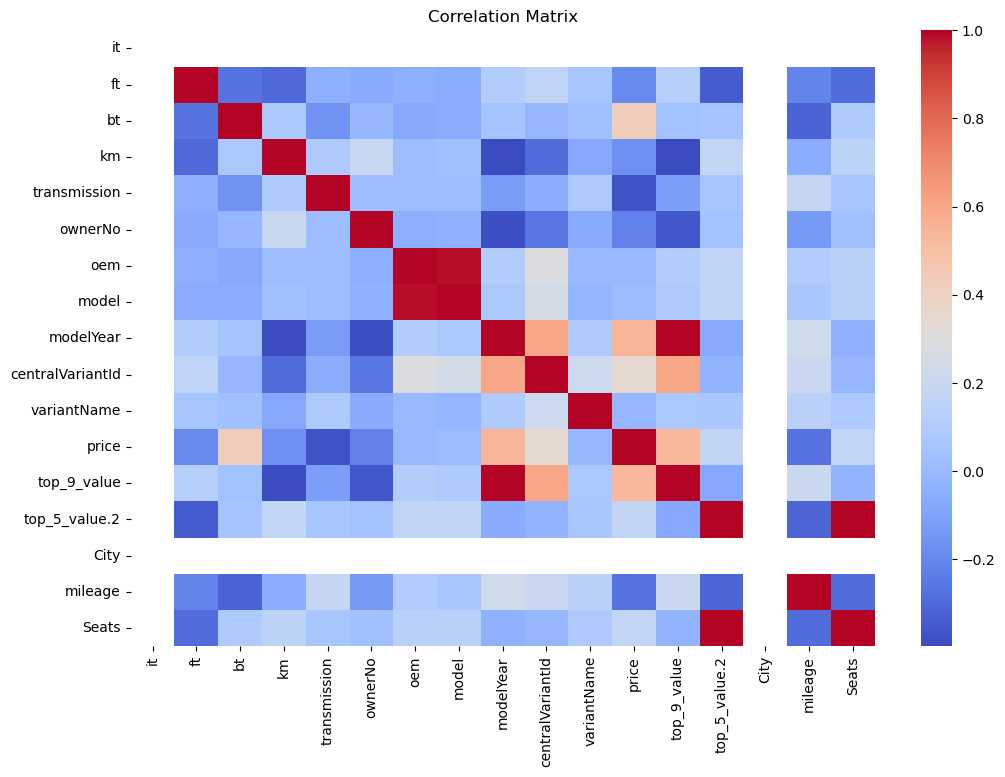

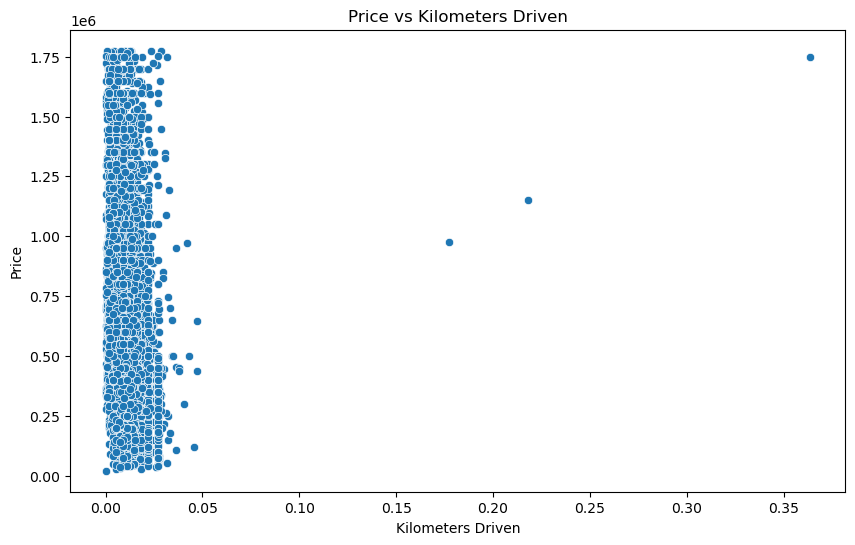

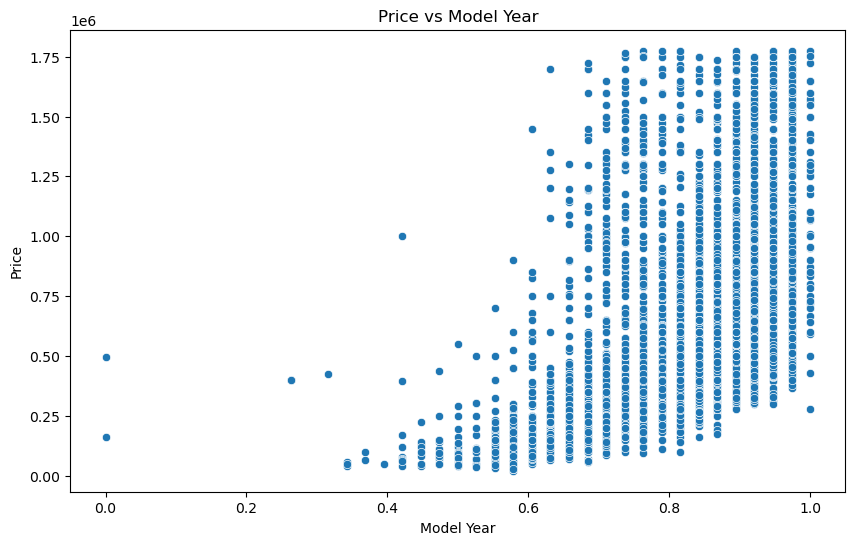

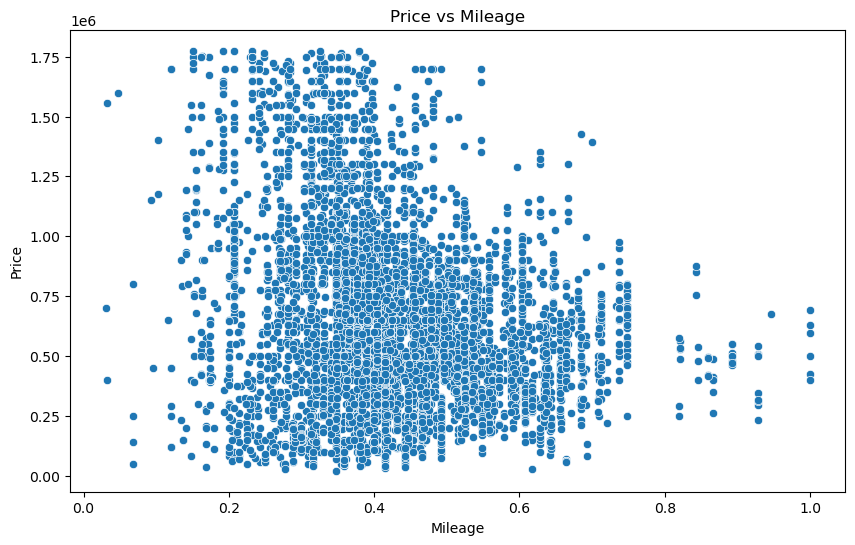

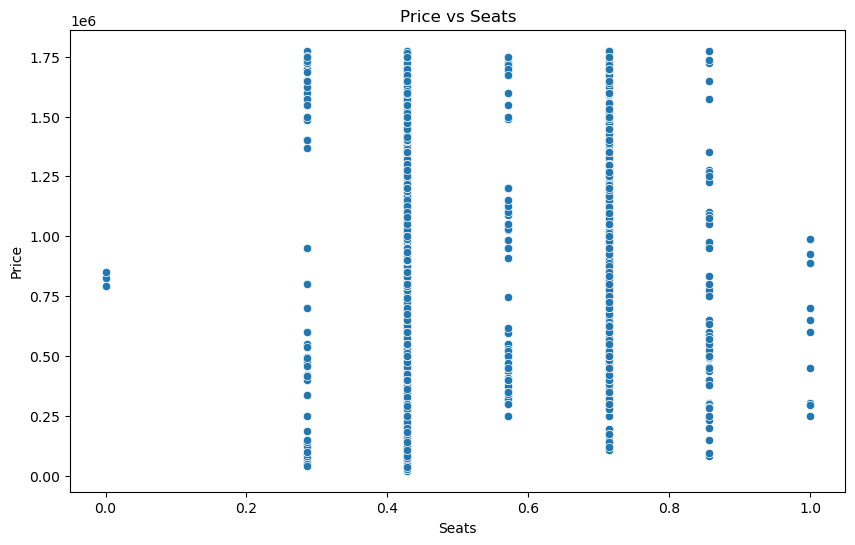

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned dataset with scaling
df_scaled = pd.read_csv('D:/project 3/cleaned_dataset/car_dekho_cleaned_dataset.csv')

# Distribution Plot for Price
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Kilometers Driven
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['km'], kde=True)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Model Year
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['modelYear'], kde=True)
plt.title('Distribution of Model Year')
plt.xlabel('Model Year')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Mileage
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['mileage'], kde=True)
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Distribution Plot for Seats
plt.figure(figsize=(10, 6))
sns.histplot(df_scaled['Seats'], kde=True)
plt.title('Distribution of Seats')
plt.xlabel('Seats')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns
df_numeric = df_scaled.select_dtypes(include=[np.number])

# Correlation Matrix for the scaled data
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plot of Price vs Kilometers Driven
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km', y='price', data=df_scaled)
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Model Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='modelYear', y='price', data=df_scaled)
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Mileage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mileage', y='price', data=df_scaled)
plt.title('Price vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

# Scatter Plot of Price vs Seats
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seats', y='price', data=df_scaled)
plt.title('Price vs Seats')
plt.xlabel('Seats')
plt.ylabel('Price')
plt.show()

In [22]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('D:/project 3/streatured/car_dekho_Structured.csv', low_memory=False)

# Drop columns with more than 50% missing values
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Helper function to convert price from various formats to float
def convert_price(price):
    try:
        # Remove the currency symbol (₹) and commas
        price = str(price).replace('₹', '').replace(',', '').strip()
        
        # Handle prices in "Crore"
        if 'Crore' in price:
            return float(price.replace('Crore', '').strip()) * 10000000
        
        # Handle prices in "Lakh"
        elif 'Lakh' in price:
            return float(price.replace('Lakh', '').strip()) * 100000
        
        # Handle plain numeric prices
        else:
            return float(price)
    
    except ValueError:
        # Return NaN if conversion fails
        return np.nan

# Apply conversion function to the 'price' column
df['price'] = df['price'].apply(convert_price)


# Clean the 'km' column by removing commas and converting to integers
df['km'] = df['km'].str.replace('Kms', '').str.replace(',', '').astype(float)

# Fill missing values for numerical columns
df.fillna({
    'price': df['price'].median(),
    'ownerNo': df['ownerNo'].median(),
    'km': df['km'].median()
}, inplace=True)

# Remove the 'owner' column since it's the same as 'ownerNo'
df.drop(columns=['owner'], inplace=True)

# Clean and extract mileage from 'top_0_value.2' column and rename the column
def clean_mileage(mileage):
    try:
        mileage = str(mileage).replace('kmpl', '').replace('km/kg', '').strip()
        mileage_float = float(mileage)
        if mileage_float < 100:  # Assuming mileage values should be less than 100
            return mileage_float
        else:
            return np.nan
    except ValueError:
        return np.nan

df['mileage'] = df['top_0_value.2'].apply(clean_mileage)

# Clean and extract seats from 'top_3_value' column and rename the column
def clean_seats(seats):
    try:
        seats = str(seats).replace('Seats', '').strip()
        seats_int = int(seats)
        if seats_int < 10:  # Assuming seat values should be less than 10
            return seats_int
        else:
            return np.nan
    except ValueError:
        return np.nan

df['Seats'] = df['top_3_value'].apply(clean_seats)

# Drop the original columns 'top_0_value.2' and 'top_3_value'
df.drop(['top_0_value.2', 'top_3_value'], axis=1, inplace=True)

# Removing outliers using IQR for 'price'
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

# Save the cleaned data
df.to_csv('D:/project 3/cleaned_dataset/car_dekho_cleaned_dataset_Raw.csv', index=False)

print("Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset_Raw.csv'.")

Data cleaning complete. Cleaned dataset saved as 'car_dekho_cleaned_dataset_Raw.csv'.


In [58]:
import pandas as pd

df = pd.read_csv('D:/project 3/cleaned_dataset/car_dekho_cleaned_dataset.csv')
df.head()

C:\Users\Siva\AppData\Local\Temp\ipykernel_177352\372894267.py:3: DtypeWarning: Columns (155) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('D:/project 3/cleaned_dataset/car_dekho_cleaned_dataset.csv')


,it,ft,bt,km,transmission,ownerNo,oem,model,modelYear,centralVariantId,...,data_2_list_10_key,data_2_list_10_value.1,data_2_list_11_key,data_2_list_11_value.1,top_5_key.1,top_5_value.2,car_links,City,mileage,Seats
0,0,4,2,0.021818,1,0.6,20,160,0.789474,3979,...,No Door Numbers,5,Cargo Volumn,235-litres,NaN,NaN,https://www.cardekho.com/used-car-details/used...,0,0.561711,0.428571
1,0,4,7,0.005947,1,0.4,6,50,0.868421,6087,...,Cargo Volumn,352-litres,NaN,NaN,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.347826,0.428571
2,0,4,2,0.002173,1,0.2,29,273,0.868421,2983,...,Alloy Wheel Size,14,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.587658,0.428571
3,0,4,8,0.003235,1,0.2,9,87,0.763158,1867,...,Alloy Wheel Size,14,No Door Numbers,4,Seats,5.0,https://www.cardekho.com/buy-used-car-details/...,0,0.421459,0.428571
4,0,1,7,0.010909,1,0.2,20,178,0.789474,4277,...,Alloy Wheel Size,16,No Door Numbers,5,Seats,5.0,https://www.cardekho.com/used-car-details/used...,0,0.580996,0.428571


In [60]:
print(df.isnull().sum())

it                  0
ft                  0
bt                  0
km                  0
transmission        0
                 ... 
top_5_value.2    3116
car_links           0
City                0
mileage           167
Seats              60
Length: 214, dtype: int64


In [64]:
import pandas as pd
import numpy as np


# Define the threshold for dropping columns
threshold = 0.7 * len(df)

# Drop columns with more than 70% missing values
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Select only numeric columns to fill NaN values
numeric_cols = df_cleaned.select_dtypes(include=[np.number])

# Fill remaining NaN values in numeric columns with the mean
df_cleaned[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

print(df_cleaned)


      it  ft  bt        km  transmission  ownerNo  oem  model  modelYear  \
0      0   4   2  0.021818             1      0.6   20    160   0.789474   
1      0   4   7  0.005947             1      0.4    6     50   0.868421   
2      0   4   2  0.002173             1      0.2   29    273   0.868421   
3      0   4   8  0.003235             1      0.2    9     87   0.763158   
4      0   1   7  0.010909             1      0.2   20    178   0.789474   
...   ..  ..  ..       ...           ...      ...  ...    ...        ...   
7486   0   4   2  0.001818             1      0.2   20    160   0.973684   
7487   0   4   2  0.021818             1      0.2   20    155   0.763158   
7488   0   4   8  0.009091             0      0.6   21    197   0.684211   
7489   0   4   2  0.007273             1      0.2   20    175   0.710526   
7490   0   1   7  0.021818             1      0.4   27    236   0.842105   

      centralVariantId  ...  data_2_list_7_key  data_2_list_7_value.1  \
0             

C:\Users\Siva\AppData\Local\Temp\ipykernel_177352\316867409.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


In [66]:
print(df_cleaned.isnull().sum())

it                          0
ft                          0
bt                          0
km                          0
transmission                0
                         ... 
data_2_list_9_value.1    1520
car_links                   0
City                        0
mileage                     0
Seats                       0
Length: 191, dtype: int64


In [68]:
df_cleaned.to_csv('D:/project 3/cleaned_dataset/car_dekho_cleaned_dataset.csv', index=False)